In [81]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [61]:
XRANGE = np.pi / 8
YRANGE = np.pi / 8
WIDTH = 500
HEIGHT = 500
DEPSILON = 0.001

In [62]:
phi_x = np.linspace(start=-XRANGE, stop=XRANGE, num=WIDTH)
phi_y = np.linspace(start=-YRANGE, stop=YRANGE, num=HEIGHT)

In [63]:
phi_xy = np.stack(np.meshgrid(phi_x, phi_y), axis=-1)

In [64]:
rays = np.stack(( np.cos(phi_xy[:,:,1]) * np.sin(phi_xy[:,:,0]), 
               np.sin(phi_xy[:,:,1]), 
              -np.cos(phi_xy[:,:,1]) * np.cos(phi_xy[:,:,0])), 
              axis=-1)

In [65]:
def dist_sphere(position, sphere):
    return np.sqrt(np.square(position[:,:,0] - sphere[0]) + np.square(position[:,:,1] - sphere[1]) + np.square(position[:,:,2] - sphere[2])) - 1

In [66]:
def frac(x):
    return x - np.floor(x)

  0%|          | 0/500 [00:00<?, ?it/s]

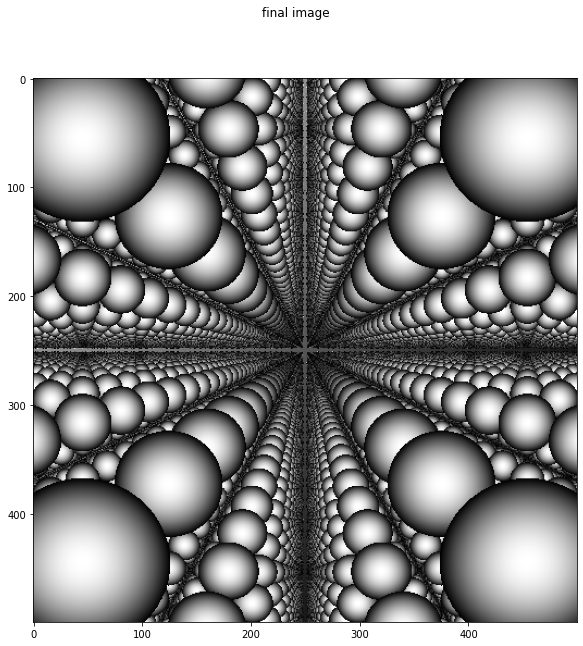

In [82]:
def dist(position):
    position = position.reshape(-1, 3)
    position = position % 5.
    position = position.reshape(HEIGHT, WIDTH, 3)
    return dist_sphere(position, [2.5, 2.5, 2.5])

position_new = np.zeros((HEIGHT, WIDTH, 3))
dist_new = dist(position_new)

for _ in tqdm(range(500)):
    position_old = position_new
    dist_old = dist_new

    position_new = position_old + np.repeat(dist_old, 3, axis=-1).reshape(HEIGHT, WIDTH, 3) * rays
    dist_new = dist(position_new)

dist_dx = dist(position_new + np.array([DEPSILON, 0, 0])) - dist_old
dist_dy = dist(position_new + np.array([0, DEPSILON, 0])) - dist_old
dist_dz = dist(position_new + np.array([0, 0, DEPSILON])) - dist_old

dist_gradient = np.stack((dist_dx, dist_dy, dist_dz), axis=-1) / DEPSILON

dist_gradient /= np.repeat(np.sqrt(np.sum(np.power(dist_gradient, 2), axis=-1)), 3).reshape(HEIGHT, WIDTH, 3)


final_image = np.power(np.sum(dist_gradient * rays, axis=-1), 2)

plt.subplots(figsize=(10, 10))
plt.suptitle('final image')
plt.imshow(final_image, cmap='gray')
plt.show()

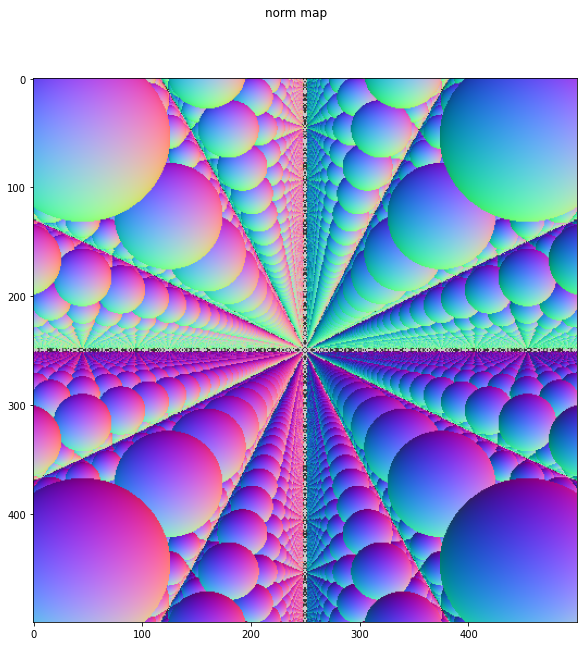

In [83]:
plt.subplots(figsize=(10, 10))
plt.suptitle('norm map')
plt.imshow((dist_gradient + 1.) / 2.)
plt.show()